In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from osgeo import gdal

In [3]:
from PIL import Image

In [4]:
import math

In [5]:
import pandas as pd

In [6]:
import random

In [1]:
pip install open3d

  Obtaining dependency information for open3d from https://files.pythonhosted.org/packages/91/79/7609d49bb8c86d5dcd9684f72449b512d8787708f975fd003acb78c63786/open3d-0.18.0-cp311-cp311-macosx_13_0_arm64.whl.metadata
  Obtaining dependency information for dash>=2.6.0 from https://files.pythonhosted.org/packages/72/ef/d46131f4817f18b329e4fb7c53ba1d31774239d91266a74bccdc932708cc/dash-2.18.2-py3-none-any.whl.metadata
  Obtaining dependency information for configargparse from https://files.pythonhosted.org/packages/6f/b3/b4ac838711fd74a2b4e6f746703cf9dd2cf5462d17dac07e349234e21b97/ConfigArgParse-1.7-py3-none-any.whl.metadata
  Obtaining dependency information for addict from https://files.pythonhosted.org/packages/6a/00/b08f23b7d7e1e14ce01419a467b583edbb93c6cdb8654e54a9cc579cd61f/addict-2.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for pyquaternion from https://files.pythonhosted.org/packages/49/b3/d8482e8cacc8ea15a356efea13d22ce1c5914a9ee36622ba250523240bf2/pyquaternion

# Import landscape environment

In [7]:
getty_landscape = gdal.Open('landscapeAnalysis/USGS_one_meter_x36y378_CA_LosAngeles_2016.tif')
band1_getty = getty_landscape.GetRasterBand(1)
b1_getty = band1_getty.ReadAsArray()
UE_selected = b1_getty[5000:8500,2000:5500]

In [10]:
fname = 'getty_USGS_one_meter_x36y378_CA_LosAngeles_2016_gray_5000_8500_2000_5500.png'
image = Image.open(fname)#.convert("L")
arr = np.asarray(image)
DEM_max = 516.47955
DEM_min = 153.0624
DEM_RE = arr * (DEM_max - DEM_min) / (np.max(gray_DEM) - np.min(gray_DEM)) + DEM_min

NameError: name 'gray_DEM' is not defined

In [ ]:
conda install conda-forge::rasterio

python(64250) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Retrieving notices: ...working... done
Channels:
 - defaults
 - conda-forge
 - anaconda
Platform: osx-arm64
Solving environment: 

In [1]:
import rasterio as rio
import numpy as np

def raster_to_cloud(rasterPath, outfile=None):

    raster = rio.open(rasterPath, "r")
    
    affineTrafo = raster.transform
    noDataVal = raster.get_nodatavals()[0]

    trafoMat = np.array([[affineTrafo[0],affineTrafo[1],affineTrafo[2]],
                         [affineTrafo[3],affineTrafo[4],affineTrafo[5]],
                         [0,0,1]])

    zVals = np.squeeze(raster.read())
    noDataMask = np.array(zVals.reshape(-1)!=noDataVal)

    myMesh = np.array(np.meshgrid(np.arange(zVals.shape[0]), np.arange(zVals.shape[1]), np.array([1]), indexing="ij"))
    myMesh = np.squeeze(myMesh).transpose(1,2,0).reshape(-1,3)[noDataMask,:]

    zVals = zVals.reshape(-1)[noDataMask]

    myMesh = np.apply_along_axis(lambda x: np.matmul(trafoMat, x), axis=-1, arr=myMesh)
    myMesh[:,2] = zVals

    if outfile:
        np.savetxt(outfile, myMesh)

    return myMesh

In [2]:
raster_to_cloud('landscapeAnalysis/USGS_one_meter_x36y378_CA_LosAngeles_2016.tif', 'raster_LA_grid.txt')

array([[3.59994000e+05, 3.78000600e+06, 3.30184662e+02],
       [3.59994000e+05, 3.78000500e+06, 3.30171875e+02],
       [3.59994000e+05, 3.78000400e+06, 3.30156158e+02],
       ...,
       [3.70005000e+05, 3.76999700e+06, 7.53002243e+01],
       [3.70005000e+05, 3.76999600e+06, 7.53113785e+01],
       [3.70005000e+05, 3.76999500e+06, 7.52700500e+01]])

In [ ]:
gray_DEM = arr

In [ ]:
gray_DEM_max = np.max(gray_DEM)

In [ ]:
gray_DEM_min = np.min(gray_DEM)

In [9]:
UE_selected = DEM_RE

NameError: name 'DEM_RE' is not defined

- Camera locations optimization

In [118]:
118.518720147 - (118.518720147 - 118.408637375)*0.2

118.4967035926

In [119]:
118.518720147 - (118.518720147 - 118.408637375)*0.55

118.4581746224

In [120]:
34.1515898948 - (34.1515898948 - 34.0626170627)*0.5

34.10710347875

In [121]:
34.1515898948 - (34.1515898948 - 34.0626170627)*0.85

34.075962987515

In [122]:
import random

In [127]:
random.randint(5, 15)

13

In [138]:
import csv
f = open('fireImageExploration/optimized_cam_loc/camera_loc.csv', 'w')

# create the csv writer
writer = csv.writer(f)

In [139]:
header = ['longitude', 'lattitude', 'vertical_pose', 'horizontal_pose']
writer.writerow(header)

51

In [140]:
for i in range(20):
    longitude = - ( 118.4967035926 - (118.4967035926 - 118.4581746224) * random.random())
    lattitude = 34.10710347875 - (34.10710347875 - 34.075962987515) * random.random()
    for j in range(4):
        vertical_pose = random.randint(-45, 45)
        horizontal_pose = random.randint(-180, 180)
        writer.writerow([longitude, lattitude, vertical_pose, horizontal_pose])

In [141]:
f.close()

- UE height transformation

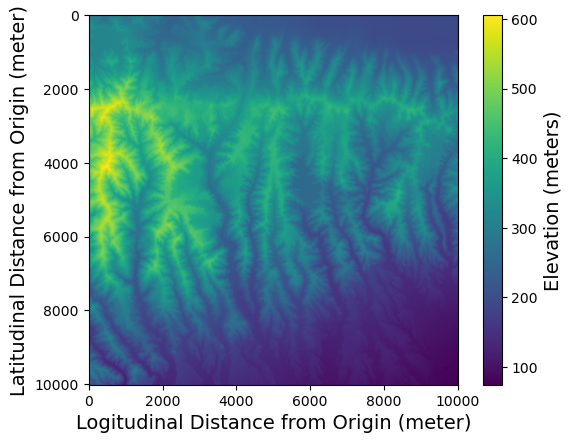

In [11]:
f = plt.figure()
plt.imshow(b1_getty)
#plt.title('Getty Fire Area Digital Elevation Map')
#plt.savefig('Tiff.png')
#plt.imshow(mono_img)
ax = f.get_figure()
#ax = f.add_subplot(1,1,1)
plt.xlabel('Logitudinal Distance from Origin (meter)', fontsize=14)
plt.ylabel('Latitudinal Distance from Origin (meter)', fontsize = 14)
#plt.tick_params(axis='both', which='major', labelsize=18)
#plt.xtics(-118.518720147, -118.408637375, (118.518720147 - 118.408637375)/2)
#ax.yticks([3.7], minor=True)
cb = plt.colorbar()
cb.set_label('Elevation (meters)', fontsize = 14)#, rotation=270
#fig = ax.get_figure()
f.savefig('map.pdf')


In [74]:
b1_getty.shape

(10012, 10012)

In [47]:
from mpl_toolkits.mplot3d import Axes3D

In [98]:
viz_selected = b1_getty[0:2000, 4000:6000]

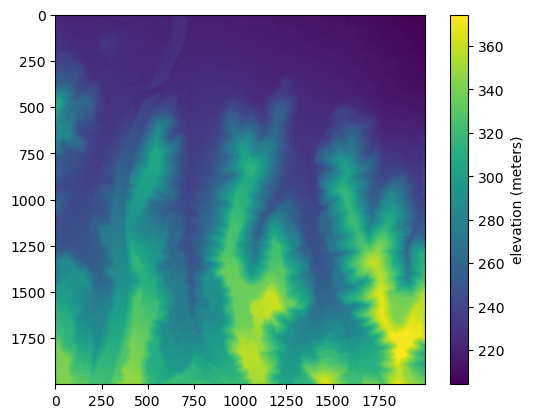

In [102]:
f = plt.figure()
plt.imshow(viz_selected)
#plt.title('Getty Fire Area Digital Elevation Map')
#plt.savefig('Tiff.png')
#plt.imshow(mono_img)
cb = plt.colorbar()
cb.set_label('elevation (meters)')#, rotation=270
#fig = ax.get_figure()
f.savefig('terrain_Analysis/0_2000_4000_6000map.png')
plt.show()

In [52]:
x_list = []
y_list = []
z_list = []
for y in range(2000):
    for x in range(2000):
        x_list.append(x)
        y_list.append(y)
        z_list.append(viz_selected[y][x])

In [55]:
from matplotlib import cm

In [58]:
x_arr = np.array(x_list)
y_arr = np.array(y_list)
z_arr = np.array(z_list)

In [62]:
x = np.arange(2000)
y = np.arange(2000)

In [68]:
np.flip(x)

array([1999, 1998, 1997, ...,    2,    1,    0])

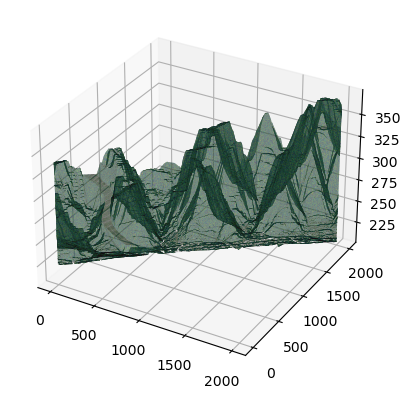

In [101]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
  

# as plot_surface needs 2D arrays as input
x = np.arange(2000)
y = np.arange(2000)


# data_value shall be represented by color
data_value = np.random.rand(len(y), len(x))
# map the data to rgba values from a colormap
colors = cm.ScalarMappable(cmap = "viridis").to_rgba(data_value)


# plot_surface with points X,Y,Z and data_value as colors
surf = ax.plot_surface(x, y, viz_selected, rstride=1, cstride=1, facecolors=colors,
                       linewidth=0, antialiased=True)
fig.savefig('terrain_Analysis/map_0_2000_4000_6000_mesh.png')
plt.show()

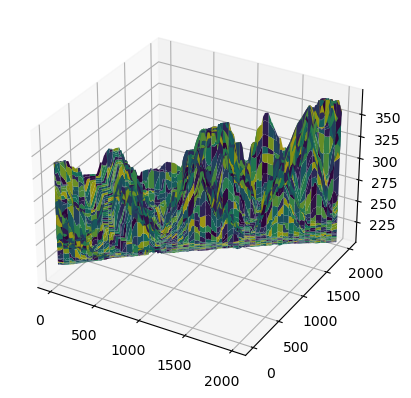

In [100]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
  

# as plot_surface needs 2D arrays as input
x = np.arange(2000)
y = np.arange(2000)


# data_value shall be represented by color
data_value = np.random.rand(len(y), len(x))
# map the data to rgba values from a colormap
colors = cm.ScalarMappable(cmap = "viridis").to_rgba(data_value)


# plot_surface with points X,Y,Z and data_value as colors
surf = ax.plot_surface(x, y, viz_selected, facecolors=colors,
                       linewidth=0, antialiased=True)
fig.savefig('terrain_Analysis/map_0_2000_4000_6000.png')
plt.show()

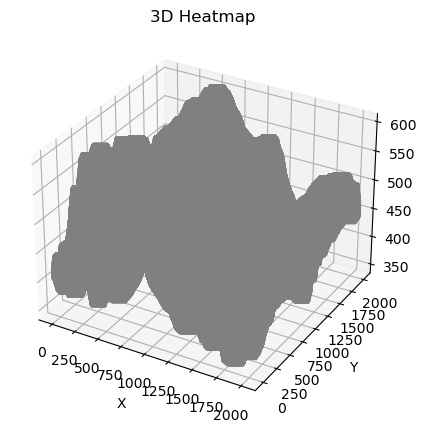

In [54]:
# creating 3d figures
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
  
# configuring colorbar
#color_map = cm.ScalarMappable(cmap=cm.gray)
#color_map.set_array(colo)
  
# creating the heatmap
img = ax.scatter(x_list, y_list, z_list, marker='s', 
                 s=99, color='gray')
#plt.colorbar(color_map)
  
# adding title and labels
ax.set_title("3D Heatmap")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('')
  
# displaying plot
plt.show()

In [28]:
UE_height =(elevation + height - 153.0624)*70.4424653597112 - 12800

NameError: name 'elevation' is not defined

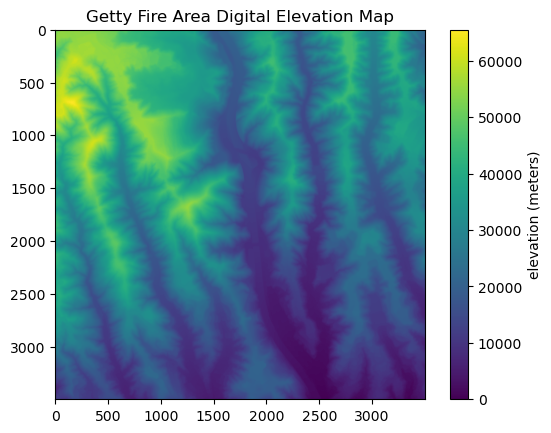

In [38]:
f = plt.figure()
plt.imshow(gray_DEM)
plt.title('Getty Fire Area Digital Elevation Map')
#plt.savefig('Tiff.png')
#plt.imshow(mono_img)
cb = plt.colorbar()
cb.set_label('elevation (meters)')#, rotation=270
#fig = ax.get_figure()
#f.savefig('topoMap.png')
plt.show()

# TopoMono monocular topography depth map

In [12]:
def elevation_calc(x):
    return (x + 12800)/70.44246535971129 + 153.0624
def elevation_calc(x):
    return (x + 12800)/70.44246535971129 + 153.0624
def raster_k(X_pixel, hFOV):
    return math.tan(math.radians(hFOV * (X_pixel - 1920/2)/1920))
def beam_k(X_pixel, vFOV):
    return math.tan(math.radians(vFOV * (X_pixel - 1080/2)/1080))
def beam_k_p(X_pixel, vFOV, p):
    return math.tan(math.radians(vFOV * (X_pixel - 1080/2)/1080 + p))

In [13]:
def topo_Depth_C(X_pixel, Y_pixel, X_raster, Y_raster, vFOV, hFOV, pitch, elevation):

    elev_cam = elevation_calc(elevation)
    k_r = raster_k(X_pixel,vFOV)
    k_b = beam_k_p(Y_pixel, hFOV, pitch)
    d_b = elev_cam - k_b*X_raster
    d_r = Y_raster - k_r*X_raster
    for i in range(0, 1200):
        x = X_raster - i
        y = math.floor(k_r*x+d_r)
        view_elevation = k_b * x + d_b
        #print(x, y, img[y][x])
        #print(x, y, UE_selected[y][x],view_elevation)
        elevation_array.append(img[y][x])
        number_bin.append(x)
        elevation_array.append(UE_selected[y][x])
        #number_bin.append(x)
        if (view_elevation < UE_selected[y][x]):      
            print(x, y, UE_selected[y][x],view_elevation)
            return x,y
    return -1, -1

In [26]:
elevation_array = []
number_bin = []
k_b = 0
d_b = 0
def topo_Depth_8(Y_pixel, X_pixel):
    X_raster = 2100
    Y_raster = 1100
    vFOV = 21.618612
    hFOV = 37.497356

    elev_cam = elevation_calc(-951.6900344)
    k_r = raster_k(X_pixel,vFOV)
    k_b = beam_k(Y_pixel, hFOV)
    d_b = elev_cam - k_b*X_raster
    d_r = Y_raster - k_r*X_raster
    for i in range(0, 1200):
        x = X_raster - i
        y = math.floor(k_r*x+d_r)
        view_elevation = k_b * x + d_b
        #print(x, y, img[y][x])
        #print(x, y, UE_selected[y][x],view_elevation)
        elevation_array.append(UE_selected[y][x])
        #number_bin.append(x)
        #elevation_array.append(UE_selected[y][x])
        number_bin.append(x)
        if (view_elevation < UE_selected[y][x]):      
            print(x, y, UE_selected[y][x],view_elevation)
            return x,y
    return -1, -1

In [51]:
X_pixel = 1050
Y_pixel = 460
vFOV = 21.618612
hFOV = 37.497356
X_raster = 2100
Y_raster = 1100

elev_cam = elevation_calc(-951.6900344)
k_b = beam_k(Y_pixel, hFOV)
d_b = elev_cam - k_b*X_raster

In [52]:
topo_Depth_8(460, 1050)

1374 1087 356.74463 356.4833882545969


(1374, 1087)

In [83]:
import seaborn as sns

In [84]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [85]:
sns.color_palette("Set2")[0]

(0.4, 0.7607843137254902, 0.6470588235294118)

In [88]:
sns.color_palette("Set2")[1]

(0.9882352941176471, 0.5529411764705883, 0.3843137254901961)

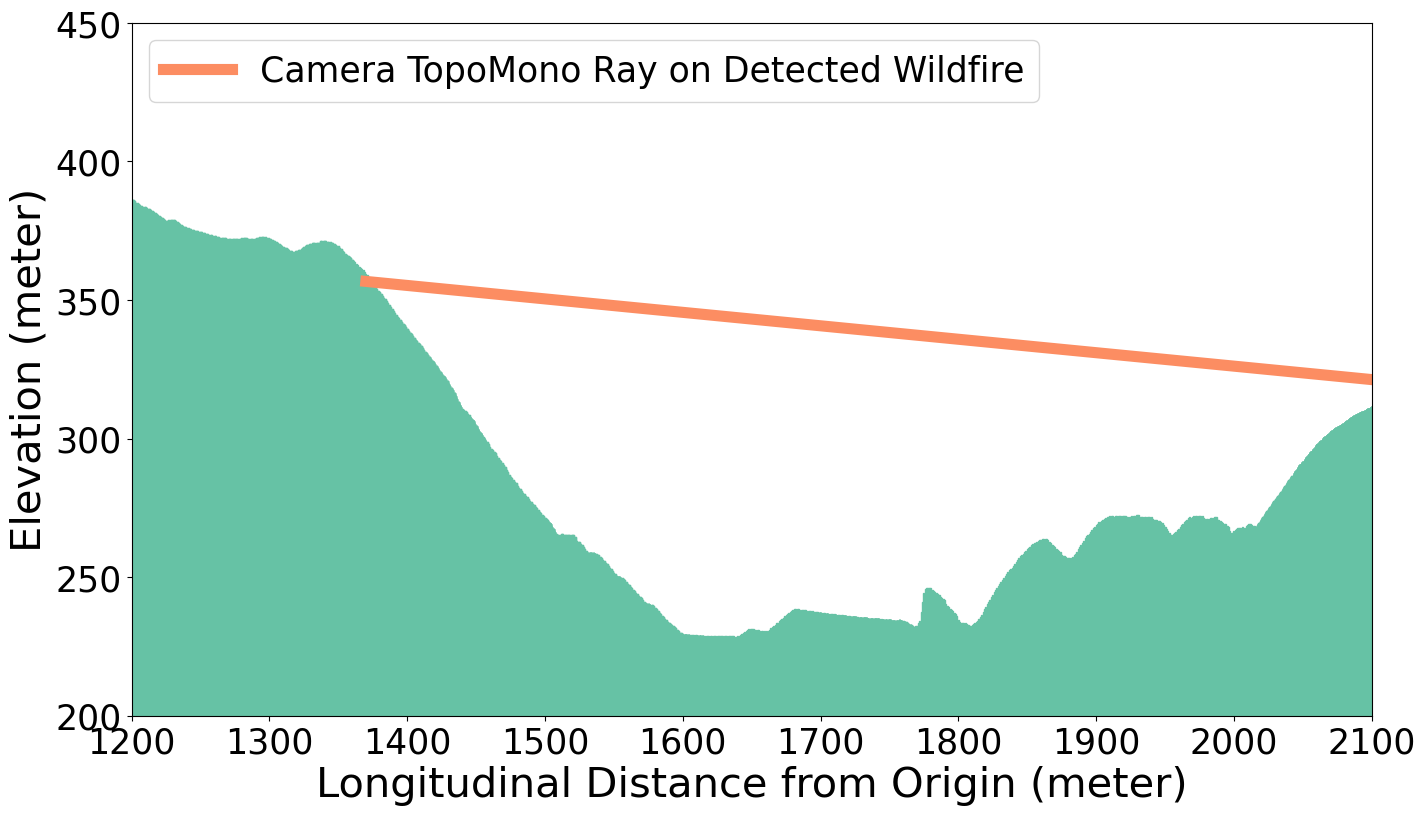

In [100]:
fig = plt.figure(figsize = (16, 9))
bars = plt.bar(number_bin, elevation_array, color = (0.4, 0.7607843137254902, 0.6470588235294118),linewidth=1)
for bar in bars:
    bar.set_edgecolor((0.4, 0.7607843137254902, 0.6470588235294118))
    
#plt.title("Pixel-based radiance vector intersect with travesal terrain's elevation", size = 15)
x = np.linspace(1370,2142,100)
y = k_b * x + d_b
plt.plot(x, y, label='Camera TopoMono Ray on Detected Wildfire', linewidth = 8, color = (0.9882352941176471, 0.5529411764705883, 0.3843137254901961))
plt.xlabel('Longitudinal Distance from Origin (meter)', size = 30)
plt.ylabel('Elevation (meter)',size = 30)
plt.legend(loc='upper left', fontsize="25")
plt.ylim([200,450])
plt.xlim([1200,2100])



plt.show()
fig.savefig('RadianceVectorIntersect_1.png')

In [24]:
elevation_array

[311.2608,
 311.00546,
 310.77557,
 310.5377,
 310.26074,
 309.9768,
 309.7147,
 309.47208,
 309.24878,
 309.03668,
 308.84543,
 308.64346,
 308.40393,
 308.1456,
 307.8633,
 307.5449,
 307.1921,
 306.79196,
 306.40363,
 306.04074,
 305.67346,
 305.31512,
 304.94452,
 304.56342,
 304.22922,
 303.98114,
 303.67673,
 303.36362,
 302.99817,
 302.5864,
 302.19086,
 301.80728,
 301.42255,
 301.04376,
 300.60672,
 300.09174,
 299.6252,
 299.1709,
 298.6226,
 298.05716,
 297.50598,
 296.92755,
 296.29706,
 295.61456,
 294.9771,
 294.43692,
 293.93652,
 293.3737,
 292.71503,
 292.04785,
 291.3674,
 290.7919,
 290.3017,
 289.64716,
 288.9164,
 288.2472,
 287.59048,
 286.958,
 286.30084,
 285.62216,
 284.97382,
 284.2885,
 283.61502,
 282.8806,
 282.0796,
 281.36044,
 280.68835,
 280.0054,
 279.32425,
 278.61444,
 278.0036,
 277.4012,
 276.72675,
 276.00546,
 275.30307,
 274.67172,
 273.949,
 273.1255,
 272.36795,
 271.64517,
 270.89676,
 270.14288,
 269.39474,
 268.7083,
 268.06778,
 267.41565,

# Input the Fire Deetection result

In [14]:
fire_loc = pd.read_csv('VideoAnalytics/scalability_exp_20_20/Detection_Results 2.csv')
cameras_numbers = []
fire_numbers = []
for row in fire_loc.image:
    cam_info = row.split('_')
    cam_num = cam_info[2].split('.')
    cameras_numbers.append(cam_num[0])
    fire_numbers.append(cam_info[0])
    #print(cam_num)
fire_loc.loc[:,["camera#"]] = cameras_numbers
fire_loc.loc[:,["Fire#"]] = fire_numbers

In [15]:
cam8_loc=fire_loc[fire_loc['camera#']=='8']
cam1_loc=fire_loc[fire_loc['camera#']=='1']
cam11_loc=fire_loc[fire_loc['camera#']=='11']
cam4_loc=fire_loc[fire_loc['camera#']=='4']

In [ ]:
topo_

- input the fire location ground truth

In [16]:
fire_gt = pd.read_csv('VideoAnalytics/FireDepth Experiment -- UE - FireLoc.csv')

- initialize accuracy heatmap

In [12]:
mono_heatmap_20_cam11 = np.empty(shape=(20,20))
mono_heatmap_20_cam11.fill(500)
mono_heatmap_20_cam1 = np.empty(shape=(20,20))
mono_heatmap_20_cam1.fill(500)
mono_heatmap_20_cam4 = np.empty(shape=(20,20))
mono_heatmap_20_cam4.fill(500)
mono_heatmap_20_cam8 = np.empty(shape=(20,20))
mono_heatmap_20_cam8.fill(500)

In [13]:
cam8_loc=fire_loc[fire_loc['camera#']=='8']
cam1_loc=fire_loc[fire_loc['camera#']=='1']
cam11_loc=fire_loc[fire_loc['camera#']=='11']
cam4_loc=fire_loc[fire_loc['camera#']=='4']

- accuracy heatmap calculation

In [43]:
X_vec = []
Y_vec = []
for Y in range(700, 1700, 50):
    Y_vec.append(Y)
for X in range(1000, 2000, 50):
    X_vec.append(X)

In [109]:
Delta_landscape

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x15f8b6be0> >

In [117]:
band1_delta = Delta_landscape.GetRasterBand(2)

ERROR 5: fireImageExploration/USGS_1M_10_x54y449_CA_CarrHirzDeltaFires_2019_B19.tif: GDALDataset::GetRasterBand(2) - Illegal band #



In [114]:
Delta_landscape = gdal.Open('fireImageExploration/USGS_1M_10_x54y449_CA_CarrHirzDeltaFires_2019_B19.tif')
band1_delta = Delta_landscape.GetRasterBand(1)

In [115]:
b1_delta = band1_delta.ReadAsArray()

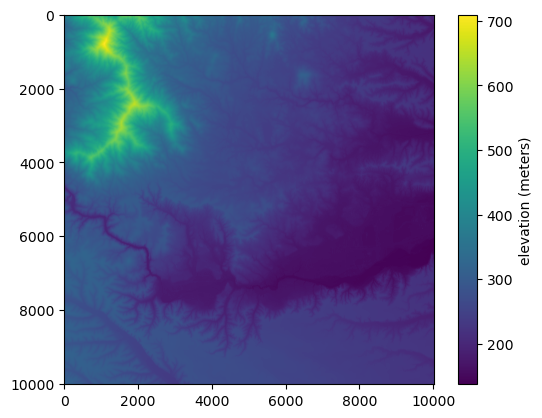

In [116]:
f = plt.figure()
plt.imshow(b1_delta)
#plt.title('Getty Fire Area Digital Elevation Map')
#plt.savefig('Tiff.png')
#plt.imshow(mono_img)
cb = plt.colorbar()
cb.set_label('elevation (meters)')#, rotation=270
#fig = ax.get_figure()
#f.savefig('map.png')
plt.show()